

# Project: Investigate a Dataset - [TMDb-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 with a data set from (TMDb) web-site with more than 10K each have about 21 coulmns wich till some data about films rating, genre ,popularity even production combany revenu and cost I Will start my analysis to answr the below questions 

### Question(s) for Analysis
1-Are movies with higher budget  received a better rating?

2-Does good rating reflecting on revenue ?

3-Which cast group are the most popular from 2000 till 2015?

4-which film gener is the most popular form 2000 till 2015

5-How did the amount of produced films changed Years?
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df_movie=pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
df_movie.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_movie.shape

(10866, 21)

In [4]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


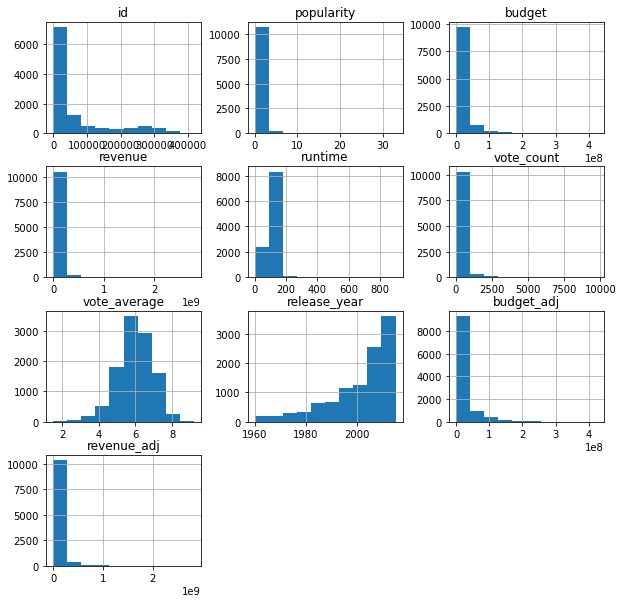

In [5]:
df_movie.hist(figsize=(10,10));

In [6]:
df_movie.sample(15)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10798,12185,tt0077663,0.188821,0,0,Heaven Can Wait,Warren Beatty|Julie Christie|James Mason|Jack ...,NaN,Warren Beatty|Buck Henry,NaN,...,Joe Pendleton is a quarterback preparing to le...,101,Fantasy|Drama|Comedy|Romance,Paramount Pictures,6/28/78,40,6.3,1978,0.000000e+00,0.000000e+00
4334,35233,tt0111094,0.148301,0,0,The Scout,Brendan Fraser|Albert Brooks|Dianne Wiest|Anne...,NaN,Michael Ritchie,He was praying for a miracle. What he got was ...,...,When his star recruit botches a Major League B...,101,Comedy|Drama,20th Century Fox,9/30/94,12,5.4,1994,0.000000e+00,0.000000e+00
8988,12159,tt0120889,1.316855,85000000,71485043,What Dreams May Come,Robin Williams|Cuba Gooding Jr.|Annabella Scio...,NaN,Vincent Ward,After life there is more. The end is just the ...,...,Chris Neilson dies to find himself in a heaven...,113,Drama|Fantasy|Romance,PolyGram Filmed Entertainment,10/2/98,328,6.7,1998,1.137041e+08,9.562522e+07
7407,7345,tt0469494,2.042620,25000000,76181545,There Will Be Blood,Daniel Day-Lewis|Paul Dano|Dillon Freasier|Cia...,NaN,Paul Thomas Anderson,There Will Be Greed. There Will Be Vengeance.,...,"When ruthless oil prospector, Daniel Plainview...",158,Drama,Miramax Films|Ghoulardi Film Company|Paramount...,12/28/07,830,7.8,2007,2.629171e+07,8.011774e+07
5837,127373,tt1932767,0.230595,6000000,1066471,What Maisie Knew,Alexander SkarsgÃ¥rd|Julianne Moore|Steve Coog...,http://www.whatmaisieknewmovie.com,Scott McGehee|David Siegel,Based on the novel by Henry James,...,"Based on the Henry James novella, the story fr...",93,Drama,Image Entertainment|120dB Films|10th Hole Prod...,5/2/13,98,7.5,2013,5.616200e+06,9.982524e+05
2147,51736,tt1409004,0.426522,0,0,Bloomington,Allison McAtee|Sarah Stouffer|Katherine Ann Mc...,http://www.bloomingtonthemovie.com/,Fernanda Cardoso,NaN,...,A former child actress attends college in sear...,83,Drama|Romance,Frontier Studios,6/23/10,23,6.1,2010,0.000000e+00,0.000000e+00
2158,45272,tt1555064,0.406941,15000000,20529194,Country Strong,Gwyneth Paltrow|Garrett Hedlund|Tim McGraw|Lei...,http://www.countrystrong-movie.com/,Shana Feste,It doesn't matter where you've been as long as...,...,Soon after the rising young singer-songwriter ...,117,Drama|Romance,Maguire Entertainment|Screen Gems|Sony Picture...,12/22/10,49,5.9,2010,1.500000e+07,2.052919e+07
4770,121606,tt1977895,0.121572,0,0,Resolution,Peter Cilella|Vinny Curran|Zahn McClarnon|Bill...,http://resolutionstory.com,Justin Benson|Aaron Moorhead,NaN,...,Michael is committed to getting his best frien...,93,Horror|Thriller|Mystery,NaN,4/20/12,35,5.9,2012,0.000000e+00,0.000000e+00
9628,918,tt0092666,0.548575,18000000,39321715,Blind Date,Kim Basinger|Bruce Willis|John Larroquette|Wil...,NaN,Blake Edwards,A date with her is every man's dream come true...,...,When bachelor Walter Davis (Bruce Willis) is s...,95,Comedy|Romance,TriStar Pictures,3/27/87,57,5.6,1987,3.454345e+07,7.546153e+07
7637,13501,tt0484111,0.323370,15000000,20380,The Good Night,PenÃ©lope Cruz|Martin Freeman|Gwyneth Paltrow|...,NaN,Jake Paltrow,Dreaming is believing.,...,"Gary, a musician, is trapped in an unhappy rel...",93,Comedy|Drama|Romance|Fantasy|Music,Destination Films|Tempesta Films|Good Night Pr...,1/25/07,16,5.5,2007,1.577503e+07,2.143301e+04


### First impression

After checking above tables I found that there are some issues needs to be cleaned such as :-
>1. As per describe function some important columns such as " Budget and revenue " had Zeros which must be converted to NAN and we can replace the NAN with column mean value .


>2. need to remove the non important columns from the data set such as :-

>> <ul>
    <li>imdb_id</li>
    <li>homepage</li>
    <li>overview</li>
    <li>tagline</li>
</ul>

>3. Date type needs to be set to date time format. 
>4. Remove films with the same name duplication 


### Data Cleaning

 

In [7]:
#1st make a function to  replace zeros with NAN 
def ToNan(data,column):
    data[column].replace(0, np.NAN, inplace=True)


In [8]:
ToNan(df_movie,'budget')
ToNan(df_movie,'revenue')
ToNan(df_movie,'runtime')
ToNan(df_movie,'budget_adj')
ToNan(df_movie,'revenue_adj')

In [9]:
mean_budget=df_movie['budget'].mean()
df_movie['budget'].fillna(value=mean_budget,inplace=True)
mean_revenue=df_movie['revenue'].mean()
df_movie['revenue'].fillna(value=mean_revenue,inplace=True)
mean_budget_adj=df_movie['budget_adj'].mean()
df_movie['budget_adj'].fillna(value=mean_budget_adj,inplace=True)
mean_revenue_adj=df_movie['revenue_adj'].mean()
df_movie['revenue_adj'].fillna(value=mean_revenue_adj,inplace=True)
mean_runtime=df_movie['runtime'].mean()
df_movie['runtime'].fillna(value=mean_runtime,inplace=True)

In [10]:
#Time to check 
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,2.683152e+07,1.082704e+08,30.902777,575.619058,0.935142,12.812941,2.893963e+07,1.328370e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,1.928750e+07,4.109376e+07,90.000000,17.000000,5.400000,1995.000000,2.460594e+07,5.877732e+07
50%,20669.000000,0.383856,3.073943e+07,8.922066e+07,99.000000,38.000000,6.000000,2006.000000,3.688774e+07,1.150774e+08
75%,75610.000000,0.713817,3.073943e+07,8.922066e+07,111.000000,145.750000,6.600000,2011.000000,3.688774e+07,1.150774e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  float64
 4   revenue               10866 non-null  float64
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  float64
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [12]:
df_movie['cast'].value_counts().head(10)

Louis C.K.                                                                          6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei             5
Bill Burr                                                                           4
Aziz Ansari                                                                         3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    3
Jim Jefferies                                                                       3
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    3
Pierre Coffin                                                                       3
Zac Efron|Vanessa Hudgens|Ashley Tisdale|Lucas Grabeel|Corbin Bleu                  3
Sylvester Stallone|Talia Shire|Burt Young|Carl Weathers|Burgess Meredith            3
Name: cast, dtype: int64

In [13]:
df_Cast = df_movie[df_movie['release_year'] > 2000]

In [14]:
df_Cast

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,21623,tt0467167,0.017396,3.073943e+07,8.922066e+07,Beneath,Nora Zehetner|Brenna O'Brien|Carly Pope|Don S....,NaN,Dagen Merrill,NaN,...,Christy (Zehetner) returns to her hometown yea...,82.0,Horror|Mystery|Thriller,MTV Films|Paramount Classics,7/8/07,14,5.0,2007,3.688774e+07,1.150774e+08
7821,39561,tt0865951,0.013017,1.100000e+06,8.922066e+07,Testosteron,Piotr Adamczyk|Magdalena Boczarska|Maria Gladk...,NaN,Tomasz Konecki|Andrzej Saramonowicz,NaN,...,"The wedding of Kornel, a young, well known TV ...",116.0,Comedy,Van Worden,3/2/07,10,6.0,2007,1.156835e+06,1.150774e+08
7822,36443,tt1039647,0.010471,2.000000e+05,8.922066e+07,The Union: The Business Behind Getting High,George H. W. Bush|George W. Bush|Chris Bennett,http://www.theunionmovie.com/,Brett Harvey,NaN,...,Filmmaker Adam Scorgie explores the illegal ma...,104.0,Comedy|Documentary,NaN,5/8/07,14,6.8,2007,2.103337e+05,1.150774e+08
7823,19934,tt1024896,0.009512,3.073943e+07,8.922066e+07,Ce soir je dors chez toi,Jean-Paul Rouve|MÃ©lanie Doutey|Kad Merad|Rhil...,NaN,Olivier Baroux,NaN,...,Alex and Laetitia appear to make the perfect c...,84.0,Comedy,SPAD Films|KL Productions|Alter Films,11/21/07,12,5.3,2007,3.688774e+07,1.150774e+08


In [15]:
#drop the uneeded columns from the new data frame.
df_movie = df_movie.drop(['keywords', 'imdb_id', 'homepage', 'overview', 'tagline'], axis=1)

In [16]:
df_movie.head(10)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [17]:
df_movie.shape


(10866, 16)

In [18]:
#convert release_date to correct date tybe 
df_movie['release_date']=pd.to_datetime(df_movie['release_date'])

In [19]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  float64       
 3   revenue               10866 non-null  float64       
 4   original_title        10866 non-null  object        
 5   cast                  10790 non-null  object        
 6   director              10822 non-null  object        
 7   runtime               10866 non-null  float64       
 8   genres                10843 non-null  object        
 9   production_companies  9836 non-null   object        
 10  release_date          10866 non-null  datetime64[ns]
 11  vote_count            10866 non-null  int64         
 12  vote_average          10866 non-null  float64       
 13  release_year    

In [20]:
df_movie.drop_duplicates()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,3.073943e+07,8.922066e+07,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95.0,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,3.688774e+07,1.150774e+08
10862,20379,0.065543,3.073943e+07,8.922066e+07,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176.0,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,3.688774e+07,1.150774e+08
10863,39768,0.065141,3.073943e+07,8.922066e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94.0,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,3.688774e+07,1.150774e+08
10864,21449,0.064317,3.073943e+07,8.922066e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80.0,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,3.688774e+07,1.150774e+08


In [21]:
df_movie['original_title'].value_counts().head()

Hamlet                  4
The Black Hole          3
Shelter                 3
The Three Musketeers    3
Julia                   3
Name: original_title, dtype: int64

In [22]:
# Remove duplication for Original film title and renam the df_movie to df 
df=df_movie.drop_duplicates(subset=['original_title'])

In [23]:
df.shape

(10571, 16)

In [24]:
# Check that no repeated film name added to the data set 
df['original_title'].value_counts().head()

Jurassic World            1
The Merchant of Venice    1
She Hate Me               1
Paparazzi                 1
Hawking                   1
Name: original_title, dtype: int64

In [25]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

### Are movies with higher budget  received a better rating?

In [26]:
#Slice DataFrame to get 2 columns 'vote_average' and 'budget_adj'
df_vote = df.loc[:, 'vote_average' : 'budget_adj']
#To make higher resolution result seprate the vote_average into two digrams less than 5 and more than 5 
df_vote_5 = df_vote[df_vote['vote_average'] < 5]
df_vote_1 =df_vote[df_vote['vote_average'] > 5]

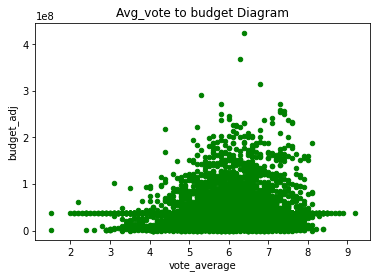

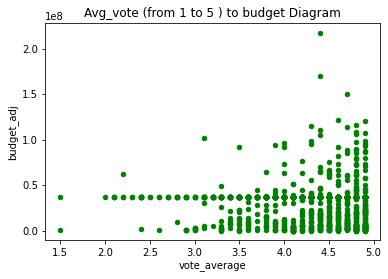

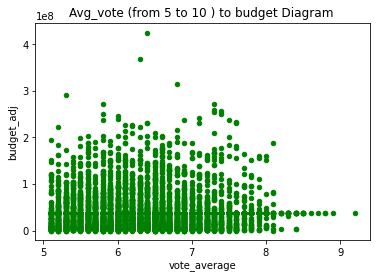

In [27]:
df_vote.plot(x='vote_average', y='budget_adj', kind='scatter',title="Avg_vote to budget Diagram",color='g');
df_vote_5.plot(x='vote_average', y='budget_adj', kind='scatter',title="Avg_vote (from 1 to 5 ) to budget Diagram",color='g');
df_vote_1.plot(x='vote_average', y='budget_adj', kind='scatter',title="Avg_vote (from 5 to 10 ) to budget Diagram ",color='g');

As per above diagrams we can notice that budget is one of the importan factors for film success but it is not the only factor as we can see some films with low budget but has a good average vote while some films with hight budget and having a low average vote

### Does good rating reflecting on revenue ?

In [28]:
#Slice DataFrame to get 2 columns 'vote_average' and 'revenue_adj'
df_rev = df.loc[:, 'vote_average' : 'revenue_adj']
#To make higher resolution result seprate the vote_average into two digrams less than 5 and more than 5 
df_rev_1_5 = df_rev[df_rev['vote_average'] < 5]
df_rev_5_10 =df_rev[df_rev['vote_average'] > 5]

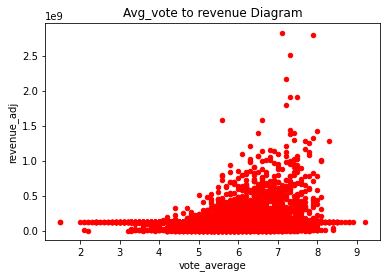

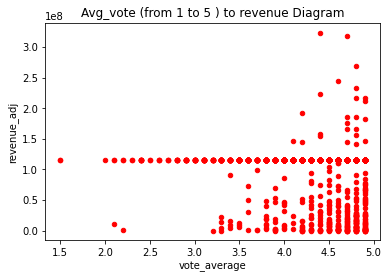

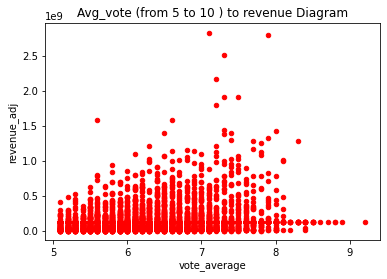

In [32]:
df_rev.plot(x='vote_average', y='revenue_adj', kind='scatter',title="Avg_vote to revenue Diagram",color='r');
df_rev_1_5.plot(x='vote_average', y='revenue_adj', kind='scatter',title="Avg_vote (from 1 to 5 ) to revenue Diagram",color='r');
df_rev_5_10.plot(x='vote_average', y='revenue_adj', kind='scatter',title="Avg_vote (from 5 to 10 ) to revenue Diagram",color='r');

>the above diagrams also shows that aavarage rate one of the most important factors on film revenue while some times may not reflected in revenue 

### Which cast group are the most popular from 2000 till 2015?

In [113]:
df_Cast = df[df['release_year'] > 2000]

<AxesSubplot:title={'center':'popular group of Cast from 2000 till 2015'}, ylabel='group of cast'>

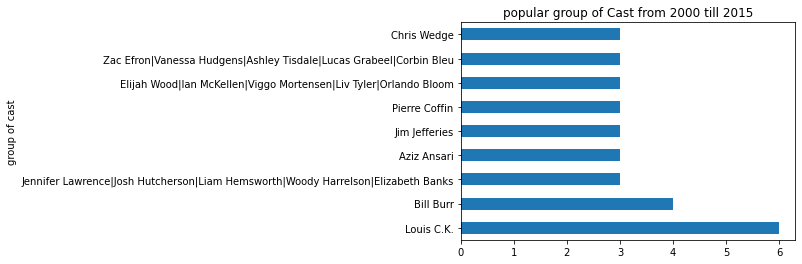

In [71]:
df_Cast= df_Cast.groupby('cast').filter(lambda x: len(x) >= 3)
df_Cast['cast'].value_counts().plot(xlabel='group of cast',ylabel='count',title="popular group of Cast from 2000 till 2015", kind = 'barh')

### which film gener is the most popular form 2000 till 2015?

Text(0.5, 1.0, 'The Distribution of genres from 2000 till 2015')

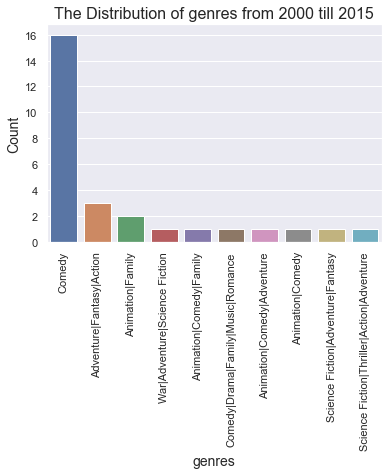

In [115]:
genres = df_Cast['genres'].value_counts().head(10).index
sns.set(style="darkgrid")
sns.countplot(data = df_Cast, x = 'genres', order = genres, orient = 'h')
plt.xticks(rotation = 90)
plt.xlabel('genres', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of genres from 2000 till 2015',fontsize=16)

### How did the amount of produced films changed Years?

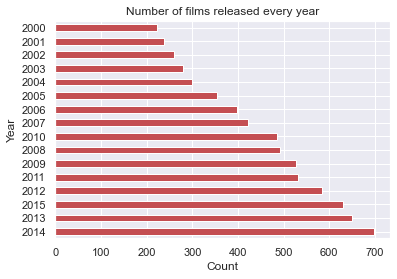

In [116]:
df_years = df.groupby('release_year').filter(lambda x: len(x) >= 220)

df_years['release_year'].value_counts().plot(kind = 'barh',color='r')
plt.title('Number of films released every year')
plt.xlabel('Count')
plt.ylabel('Year')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [36]:
df_Y2000 =df[df['release_year'] == 2000]

In [37]:
df_Y2000

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8662,77,3.095625,9.000000e+06,3.972310e+07,Memento,Guy Pearce|Carrie-Anne Moss|Joe Pantoliano|Mar...,Christopher Nolan,113.0,Mystery|Thriller,Summit Entertainment|Newmarket Capital Group|T...,2000-10-11,2144,7.9,2000,1.139663e+07,5.030104e+07
8663,8871,2.977558,1.230000e+08,3.451414e+08,How the Grinch Stole Christmas,Jim Carrey|Taylor Momsen|Jeffrey Tambor|Christ...,Ron Howard,104.0,Family|Comedy|Fantasy,Imagine Entertainment|Universal Pictures,2000-11-17,733,6.1,2000,1.557539e+08,4.370498e+08
8664,8358,2.197205,9.000000e+07,4.296321e+08,Cast Away,Tom Hanks|Helen Hunt|Chris Noth|Paul Sanchez|L...,Robert Zemeckis,143.0,Adventure|Drama,DreamWorks SKG|Twentieth Century Fox Film Corp...,2000-12-22,1854,7.3,2000,1.139663e+08,5.440398e+08
8665,107,2.153361,1.000000e+07,8.355787e+07,Snatch,Jason Statham|Brad Pitt|Vinnie Jones|Dennis Fa...,Guy Ritchie,103.0,Thriller|Crime,Columbia Pictures Corporation|SKA Films,2000-09-01,1943,7.5,2000,1.266292e+07,1.058087e+08
8666,955,1.956406,1.250000e+08,5.463881e+08,Mission: Impossible II,Tom Cruise|Dougray Scott|Thandie Newton|Ving R...,John Woo,123.0,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions|M...,2000-05-23,1269,5.8,2000,1.582865e+08,6.918869e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8883,36047,0.015997,1.500000e+07,5.217498e+06,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,Mary Lambert,105.0,Thriller,Warner Bros. Pictures,2000-07-19,12,5.2,2000,1.899438e+07,6.606877e+06
8884,97351,0.006865,3.073943e+07,8.922066e+07,Phir Bhi Dil Hai Hindustani,Juhi Chawla|Shah Rukh Khan|Johnny Lever|Shakti...,Aziz Mirza,168.0,Romance|Comedy|Drama,NaN,2000-01-21,12,7.2,2000,3.688774e+07,1.150774e+08
8885,20438,0.005784,3.073943e+07,8.922066e+07,The Tao of Steve,Donal Logue|Ayelet Kaznelson|John Hines|John H...,Jenniphr Goodman,87.0,Comedy|Romance,Good Machine|Thunderhead Productions,2000-08-04,13,5.5,2000,3.688774e+07,1.150774e+08
8886,18292,0.080819,3.073943e+07,8.922066e+07,George Washington,Candace Evanofski|Donald Holden|Damian Jewan L...,David Gordon Green,89.0,Drama,NaN,2000-10-01,14,4.9,2000,3.688774e+07,1.150774e+08


In [34]:
df_Y2015 = df[df['release_year'] == 2015]

In [35]:
df_Y2015

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,339928,0.017625,3.073943e+07,7.326550e+05,Once I Was a Beehive,Paris Warner|Lisa Clark|Hailey Smith|Clare Nie...,Maclain Nelson,119.0,Comedy|Drama|Family,Escapology|Main Dog Productions,2015-08-14,10,6.5,2015,3.688774e+07,6.740423e+05
625,367735,0.017050,3.073943e+07,8.922066e+07,John Mulaney: The Comeback Kid,John Mulaney,Rhys Thomas,62.0,Comedy,3 Arts Entertainment|Irwin Entertainment,2015-11-13,19,6.7,2015,3.688774e+07,1.150774e+08
626,266764,0.014647,3.073943e+07,8.922066e+07,Meet the Patels,Ravi Patel,Geeta Patel|Ravi Patel,88.0,Documentary,NaN,2015-09-11,20,6.7,2015,3.688774e+07,1.150774e+08
627,328346,0.030371,3.073943e+07,8.922066e+07,I Hate Christian Laettner,Rob Lowe|Ken Jeong|Verne Troyer|Mike Krzyzewski,Rory Karpf,90.0,Documentary,NaN,2015-03-15,10,6.7,2015,3.688774e+07,1.150774e+08


In [60]:
movies_industry_gain_2000=(df_Y2000['revenue_adj'].sum()-df_Y2000['budget_adj'].sum())

In [61]:
movies_industry_gain_2015=(df_Y2015['revenue_adj'].sum()-df_Y2015['budget_adj'].sum())

In [62]:
movies_industry_gain_2000

16304912327.05043

In [63]:
movies_industry_gain_2015

49703608850.85743

In [64]:
progress=(movies_industry_gain_2015/movies_industry_gain_2000)*100

In [65]:
progress

304.8382466209117

<a id='conclusions'></a>
## Conclusions


>The 1st  research question "Are movies with higher budget received a better rating?" shows that hight budget is one of the most important factor on any film succes but some times that fails to give the film the needed success as shown on the figures .

>About the 2nd research question "Does good rating reflecting on revenue ?"the figure shows that films with hight rating not always get high revenue and that was very surprising for me

>While the 3rd research question "Which cast group are the most popular from 2000 till 2015" as per data set i found that there are some actors that was most popular on that time and on 1st place was "Lois C.K " and second was " Bill Burr"

>The 4th  research questionWhat "which film gener is the most popular form 2000 till 2015" as per data set the most popular gener and on top of all geners that was produced between 2000 and 2015 it was comdy 

>The 5th research question shows how dramatically films production increases from year to year which reflects how that industry became very strong and important .
and as per the data set the total gan form Movies industry had been increased by 304 % between years 2000 and 2015






### Limitations
>Finally, we must add that all the above results are limited to the given database, adding that during the past two years and according to the COVID-19 pandemic, there has been a significant change in all production industries which naturally affects the film industry.